In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize
import json

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
%matplotlib inline

In [3]:
mongoConn = MongoClient(host='192.168.29.132', port=27017)  # 实例化MongoClient
db = mongoConn.get_database('lagou')  # 连接到Lianjia数据库

## 1 数据清洗

In [4]:
mon_data = db.py_positions.find()
jobs = pd.json_normalize([record for record in mon_data])

In [5]:
jobs.head(4)

,_id,businessZone,cId,cName,cSize,city,createTime,district,education,financeStage,...,pLabels,pLat,pLng,pName,pType,reTime,salary,salaryMonth,workAddress,workYear
0,4775802,None,62,字节跳动,2000人以上,北京,1607716386000,海淀区,本科,D轮及以上,...,[后端],39.971586,116.333692,Python开发工程师-变现业务,Python,1607673115000,25k-40k,0,北京市海淀区北三环西路43号中航广场,1-3年
1,6778769,None,62,字节跳动,2000人以上,北京,1607716786000,海淀区,本科,D轮及以上,...,None,39.971819,116.328708,Python开发工程师-安全方向,Python,1607672377000,20k-40k,0,北三环西路43号中航广场1号楼（矮楼）,1-3年
2,6413833,None,410579,建信金科,2000人以上,北京,1607782466000,海淀区,本科,不需要融资,...,"[互联网金融, 银行, Python, 后端]",40.071724,116.182631,高级Python开发工程师,Python,1607585907000,20k-40k,0,北京市海淀区建行稻香湖数据中心,3-5年
3,4870150,None,127160,积云教育,150-500人,北京,1607755653000,延庆区,本科,A轮,...,"[教育, Python]",40.417156,116.02087,Python高级讲师,Python,1607584051000,15k-30k,0,北京科技职业学院八达岭校区,3-5年


In [6]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19257 entries, 0 to 19256
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            19257 non-null  int64  
 1   businessZone   9082 non-null   object 
 2   cId            19257 non-null  int64  
 3   cName          19257 non-null  object 
 4   cSize          19257 non-null  object 
 5   city           19257 non-null  object 
 6   createTime     19257 non-null  int64  
 7   district       19257 non-null  object 
 8   education      19257 non-null  object 
 9   financeStage   19257 non-null  object 
 10  hrId           19256 non-null  float64
 11  hrPosition     18776 non-null  object 
 12  hrTags         19257 non-null  object 
 13  industryField  19257 non-null  object 
 14  p1stCat        19257 non-null  object 
 15  p2ndCat        19257 non-null  object 
 16  p3rdCat        19257 non-null  object 
 17  pAdvantage     19257 non-null  object 
 18  pDetai

### 1.0 过滤python相关的职位

In [7]:
# 抽取职位名称或者职位正文里包含 python 的
py_jobs = jobs[(jobs['pName'].str.lower().str.contains("python")) | (jobs['pDetail'].str.lower().str.contains("python"))]

In [8]:
py_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10705 entries, 0 to 19256
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            10705 non-null  int64  
 1   businessZone   5212 non-null   object 
 2   cId            10705 non-null  int64  
 3   cName          10705 non-null  object 
 4   cSize          10705 non-null  object 
 5   city           10705 non-null  object 
 6   createTime     10705 non-null  int64  
 7   district       10705 non-null  object 
 8   education      10705 non-null  object 
 9   financeStage   10705 non-null  object 
 10  hrId           10705 non-null  float64
 11  hrPosition     10421 non-null  object 
 12  hrTags         10705 non-null  object 
 13  industryField  10705 non-null  object 
 14  p1stCat        10705 non-null  object 
 15  p2ndCat        10705 non-null  object 
 16  p3rdCat        10705 non-null  object 
 17  pAdvantage     10705 non-null  object 
 18  pDetai

In [9]:
py_jobs.head(4)

,_id,businessZone,cId,cName,cSize,city,createTime,district,education,financeStage,...,pLabels,pLat,pLng,pName,pType,reTime,salary,salaryMonth,workAddress,workYear
0,4775802,None,62,字节跳动,2000人以上,北京,1607716386000,海淀区,本科,D轮及以上,...,[后端],39.971586,116.333692,Python开发工程师-变现业务,Python,1607673115000,25k-40k,0,北京市海淀区北三环西路43号中航广场,1-3年
1,6778769,None,62,字节跳动,2000人以上,北京,1607716786000,海淀区,本科,D轮及以上,...,None,39.971819,116.328708,Python开发工程师-安全方向,Python,1607672377000,20k-40k,0,北三环西路43号中航广场1号楼（矮楼）,1-3年
2,6413833,None,410579,建信金科,2000人以上,北京,1607782466000,海淀区,本科,不需要融资,...,"[互联网金融, 银行, Python, 后端]",40.071724,116.182631,高级Python开发工程师,Python,1607585907000,20k-40k,0,北京市海淀区建行稻香湖数据中心,3-5年
3,4870150,None,127160,积云教育,150-500人,北京,1607755653000,延庆区,本科,A轮,...,"[教育, Python]",40.417156,116.02087,Python高级讲师,Python,1607584051000,15k-30k,0,北京科技职业学院八达岭校区,3-5年


### 1.1 按创建时间清洗异常值

In [10]:
import time
def timestamp_to_date(ts):
    ts = ts / 1000
    time_local = time.localtime(ts)
    return time.strftime("%Y-%m", time_local)

In [11]:
py_jobs['createMon'] = py_jobs['createTime'].map(timestamp_to_date)

d:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
py_jobs.head(4)

,_id,businessZone,cId,cName,cSize,city,createTime,district,education,financeStage,...,pLat,pLng,pName,pType,reTime,salary,salaryMonth,workAddress,workYear,createMon
0,4775802,None,62,字节跳动,2000人以上,北京,1607716386000,海淀区,本科,D轮及以上,...,39.971586,116.333692,Python开发工程师-变现业务,Python,1607673115000,25k-40k,0,北京市海淀区北三环西路43号中航广场,1-3年,2020-12
1,6778769,None,62,字节跳动,2000人以上,北京,1607716786000,海淀区,本科,D轮及以上,...,39.971819,116.328708,Python开发工程师-安全方向,Python,1607672377000,20k-40k,0,北三环西路43号中航广场1号楼（矮楼）,1-3年,2020-12
2,6413833,None,410579,建信金科,2000人以上,北京,1607782466000,海淀区,本科,不需要融资,...,40.071724,116.182631,高级Python开发工程师,Python,1607585907000,20k-40k,0,北京市海淀区建行稻香湖数据中心,3-5年,2020-12
3,4870150,None,127160,积云教育,150-500人,北京,1607755653000,延庆区,本科,A轮,...,40.417156,116.02087,Python高级讲师,Python,1607584051000,15k-30k,0,北京科技职业学院八达岭校区,3-5年,2020-12


In [13]:
py_jobs[['pId', 'createMon']].groupby('createMon').count()

,pId
createMon,
2020-06,71
2020-07,204
2020-08,282
2020-09,419
2020-10,500
2020-11,2006
2020-12,7223


In [14]:
# 只看近三个月的职位
py_jobs_mon = py_jobs[py_jobs['createMon'] > '2020-09']

In [15]:
py_jobs_mon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9729 entries, 0 to 19256
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            9729 non-null   int64  
 1   businessZone   4717 non-null   object 
 2   cId            9729 non-null   int64  
 3   cName          9729 non-null   object 
 4   cSize          9729 non-null   object 
 5   city           9729 non-null   object 
 6   createTime     9729 non-null   int64  
 7   district       9729 non-null   object 
 8   education      9729 non-null   object 
 9   financeStage   9729 non-null   object 
 10  hrId           9729 non-null   float64
 11  hrPosition     9482 non-null   object 
 12  hrTags         9729 non-null   object 
 13  industryField  9729 non-null   object 
 14  p1stCat        9729 non-null   object 
 15  p2ndCat        9729 non-null   object 
 16  p3rdCat        9729 non-null   object 
 17  pAdvantage     9729 non-null   object 
 18  pDetail

### 1.2 按照薪资清洗异常值

In [16]:
py_jobs_mon[['pId', 'salary']].groupby('salary').count().index.values

array(['100k-150k', '10k-11k', '10k-12k', '10k-13k', '10k-14k', '10k-15k',
       '10k-16k', '10k-17k', '10k-18k', '10k-19k', '10k-20k', '11k-12k',
       '11k-13k', '11k-14k', '11k-15k', '11k-16k', '11k-17k', '11k-18k',
       '11k-19k', '11k-20k', '11k-21k', '11k-22k', '12k-13k', '12k-14k',
       '12k-15k', '12k-16k', '12k-17k', '12k-18k', '12k-19k', '12k-20k',
       '12k-22k', '12k-23k', '12k-24k', '13k-15k', '13k-16k', '13k-17k',
       '13k-18k', '13k-19k', '13k-20k', '13k-21k', '13k-22k', '13k-23k',
       '13k-24k', '13k-25k', '13k-26k', '14k-15k', '14k-16k', '14k-17k',
       '14k-18k', '14k-19k', '14k-20k', '14k-21k', '14k-22k', '14k-23k',
       '14k-24k', '14k-25k', '14k-27k', '14k-28k', '150k-200k', '15K-19K',
       '15k-18k', '15k-19k', '15k-20k', '15k-21k', '15k-22k', '15k-23k',
       '15k-24k', '15k-25k', '15k-26k', '15k-27k', '15k-28k', '15k-30k',
       '16k-18k', '16k-20k', '16k-21k', '16k-22k', '16k-23k', '16k-24k',
       '16k-25k', '16k-26k', '16k-28k', '16k-30

In [17]:
# 薪资高的离群值
py_jobs_mon[py_jobs_mon['salary'].isin(['150k-200k', '100k-150k'])]
# 8028936 不合理

,_id,businessZone,cId,cName,cSize,city,createTime,district,education,financeStage,...,pLat,pLng,pName,pType,reTime,salary,salaryMonth,workAddress,workYear,createMon
4986,7929582,None,141955,嘀嗒出行,150-500人,北京,1606444718000,朝阳区,本科,D轮及以上,...,40.019215,116.46791,算法技术总监,算法,1607681842000,100k-150k,16,创远路36号院朝来科技园14号楼5层,5-10年,2020-11
5028,8028936,中关村,8143,途家民宿,500-2000人,北京,1606705305000,海淀区,本科,D轮及以上,...,39.977517,116.305733,算法实习生,算法,1607438819000,150k-200k,0,苏州街29号维亚大厦,在校/应届,2020-11


In [18]:
py_jobs_mon[py_jobs_mon['salary'].isin(['1k-2k', '2k-3k', '2k-4k', '3k-4k', '3k-5k', '3k-6k'])].groupby('workYear').count()

,_id,businessZone,cId,cName,cSize,city,createTime,district,education,financeStage,...,pLabels,pLat,pLng,pName,pType,reTime,salary,salaryMonth,workAddress,createMon
workYear,,,,,,,,,,,,,,,,,,,,,
1-3年,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1年以下,6,2,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
3-5年,2,0,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
不限,21,9,21,21,21,21,21,21,21,21,...,19,21,21,21,21,21,21,21,21,21
在校/应届,169,88,169,169,169,169,169,169,169,169,...,169,169,169,169,169,169,169,169,169,169


In [19]:
# 薪资低的离群值
py_jobs_mon[(py_jobs_mon['salary'].isin(['1k-2k', '2k-3k', '2k-4k', '3k-4k', '3k-5k', '3k-6k'])) & (py_jobs_mon['workYear'] != '在校/应届')][['pId', 'pName', 'education', 'workYear', 'salary']]

# 7875784, 7935210, 7956518, 7847833, 6332921, 7636132, 5724546  不合理

,pId,pName,education,workYear,salary
238,7419328,python开发实习生,硕士,不限,3k-6k
350,7875784,"兼职全栈工程师 Python FastAPI, OpenCV, Vue, Flutter",本科,不限,2k-3k
1072,7935210,大数据平台研发工程师Java/Scala/Golang工程师,本科,1-3年,2k-4k
1145,7956518,17757-腾讯新闻数据开发工程师,本科,1-3年,1k-2k
1583,7140794,数据分析实习生,本科,不限,2k-3k
1678,7715039,数据分析实习生,本科,不限,2k-4k
2113,6287793,数据分析实习生,本科,不限,3k-4k
2114,7265753,数据分析实习生 (MJ000193),本科,不限,3k-5k
2115,6793257,数据分析实习生 (MJ000125),本科,1年以下,3k-5k
3843,7763319,算法实习生 (MJ000527),本科,不限,3k-5k


In [20]:
# 薪资跨度比较大的
py_jobs_mon[py_jobs_mon['salary'].isin(['60k-100k', '60k-120k', '65k-100k', '68k-120k', '90k-170k'])]

,_id,businessZone,cId,cName,cSize,city,createTime,district,education,financeStage,...,pLat,pLng,pName,pType,reTime,salary,salaryMonth,workAddress,workYear,createMon
1977,8040158,小红门,121758650,科锐国际人力资源,2000人以上,北京,1606881826000,丰台区,本科,上市公司,...,39.841634,116.423175,数据分析总监,数据分析,1607767553000,60k-120k,0,榴乡路88号石榴中心,不限,2020-12
4060,8043569,None,237674,京东,2000人以上,北京,1606910878000,通州区,硕士,上市公司,...,39.788989,116.565598,推荐算法工程师,算法,1607616145000,68k-120k,0,北京市通州区经海五路35号靠近盈成泰A栋研发生产楼,3-5年,2020-12
4374,7994581,None,84456978,恩诺特企业管理顾问,150-500人,北京,1605862961000,海淀区,硕士,未融资,...,40.035542,116.303276,推荐算法,算法,1606295091000,65k-100k,17,上地七街,5-10年,2020-11
4761,7353130,学院路,929,最右,500-2000人,北京,1607679399000,海淀区,本科,D轮及以上,...,39.980092,116.368056,算法leader,算法,1607756422000,60k-100k,15,花园东路11号泰兴大厦407,5-10年,2020-12
4922,6855714,None,19875,vivo,2000人以上,北京,1606999014000,朝阳区,本科,不需要融资,...,39.974985,116.490528,推荐算法专家(006762),算法,1607789393000,60k-100k,0,北京市朝阳区酒仙桥路甲12号电子城科技大厦,5-10年,2020-12
5236,7867078,None,35361,跟谁学,2000人以上,北京,1607685841000,海淀区,本科,上市公司,...,40.048632,116.282935,QA测试经理,测试,1607685833000,90k-170k,14,西北旺东路10号院7号楼博彦科技西门跟谁学总部,5-10年,2020-12
13457,7930807,None,120966820,简惟商务咨询,少于15人,深圳,1604652953000,福田区,本科,未融资,...,22.537608,114.067583,高级后端工程师（python leader）,Python,1605773631000,60k-100k,0,彩田路,5-10年,2020-11


In [21]:
# 过滤薪资异常的职位
py_jobs_mon_salary = py_jobs_mon[~py_jobs_mon['pId'].isin([8028936, 7875784, 7935210, 7956518, 7847833, 6332921, 7636132, 5724546])]

In [22]:
py_jobs_mon_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721 entries, 0 to 19256
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            9721 non-null   int64  
 1   businessZone   4713 non-null   object 
 2   cId            9721 non-null   int64  
 3   cName          9721 non-null   object 
 4   cSize          9721 non-null   object 
 5   city           9721 non-null   object 
 6   createTime     9721 non-null   int64  
 7   district       9721 non-null   object 
 8   education      9721 non-null   object 
 9   financeStage   9721 non-null   object 
 10  hrId           9721 non-null   float64
 11  hrPosition     9475 non-null   object 
 12  hrTags         9721 non-null   object 
 13  industryField  9721 non-null   object 
 14  p1stCat        9721 non-null   object 
 15  p2ndCat        9721 non-null   object 
 16  p3rdCat        9721 non-null   object 
 17  pAdvantage     9721 non-null   object 
 18  pDetail

### 1.3 按照工作经验清洗异常值

In [23]:
py_jobs_mon_salary.groupby('workYear').count()

,_id,businessZone,cId,cName,cSize,city,createTime,district,education,financeStage,...,pLabels,pLat,pLng,pName,pType,reTime,salary,salaryMonth,workAddress,createMon
workYear,,,,,,,,,,,,,,,,,,,,,
1-3年,1865,889,1865,1865,1865,1865,1865,1865,1865,1865,...,1844,1865,1865,1865,1865,1865,1865,1865,1865,1865
10年以上,38,17,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
1年以下,67,34,67,67,67,67,67,67,67,67,...,66,67,67,67,67,67,67,67,67,67
3-5年,4276,2060,4276,4276,4276,4276,4276,4276,4276,4276,...,4225,4276,4276,4276,4276,4276,4276,4276,4276,4276
5-10年,1681,843,1681,1681,1681,1681,1681,1681,1681,1681,...,1672,1681,1681,1681,1681,1681,1681,1681,1681,1681
不限,1060,464,1060,1060,1060,1060,1060,1060,1060,1060,...,1047,1060,1060,1060,1060,1060,1060,1060,1060,1060
在校/应届,734,406,734,734,734,734,734,734,734,734,...,733,734,734,734,734,734,734,734,734,734


In [24]:
py_jobs_mon_salary[py_jobs_mon_salary['workYear'] == '10年以上'][['pId', 'pName', 'education', 'workYear', 'salary']]

# 7822796 不合理

,pId,pName,education,workYear,salary
1979,7536105,资深数据分析负责人,硕士,10年以上,30k-60k
2049,7703971,数据分析负责人,本科,10年以上,30k-50k
2120,7652096,资深数据分析专家-【电商】,本科,10年以上,40k-70k
2872,7982354,资深数据平台工程师 (MJ001735),本科,10年以上,40k-80k
3115,8003261,数据仓库架构师,本科,10年以上,30k-55k
3514,7486195,首席算法科学家,本科,10年以上,80k-150k
4728,6409746,资深算法工程师,本科,10年以上,30k-50k
4742,6409722,人工智能算法科学家,博士,10年以上,50k-80k
5404,7855797,测试专家,本科,10年以上,30k-50k
5792,7858069,自动化测试开发专家,本科,10年以上,35k-50k


In [25]:
py_jobs_mon_salary[py_jobs_mon_salary['workYear'].isin(['1年以下'])].groupby('salary').count().index.values

array(['10k-13k', '10k-15k', '10k-20k', '11k-20k', '12k-18k', '12k-20k',
       '12k-24k', '13k-20k', '15K-19K', '15k-20k', '15k-30k', '18k-22k',
       '1k-2k', '20k-25k', '20k-30k', '20k-40k', '25k-35k', '30k-60k',
       '3k-4k', '3k-5k', '45k-80k', '4k-6k', '4k-7k', '5k-10k', '5k-6k',
       '5k-7k', '5k-8k', '6k-10k', '6k-12k', '6k-7k', '6k-8k', '6k-9k',
       '7k-10k', '7k-13k', '7k-9k', '8k-10k', '8k-12k', '8k-13k',
       '8k-15k', '8k-16k', '8k-9k'], dtype=object)

In [26]:
high_salary = ['12k-24k', '13k-20k', '15K-19K', '15k-20k', '15k-30k', '18k-22k', '20k-25k', '20k-30k', '20k-40k', '25k-35k', '30k-60k']
py_jobs_mon_salary[(py_jobs_mon_salary['workYear'].isin(['1年以下'])) & (py_jobs_mon_salary['salary'].isin(high_salary))][['pId', 'pName', 'education', 'workYear', 'salary']]

# 7068324, 7776447, 8007262

,pId,pName,education,workYear,salary
2361,6672560,NLP算法工程师——智能数据中心,本科,1年以下,20k-40k
2370,4229057,数据工程师,本科,1年以下,15K-19K
2991,7046162,大数据评测工程师,硕士,1年以下,15k-20k
3352,8007262,深度学习算法实习生（神经渲染方向）,硕士,1年以下,30k-60k
3362,7135445,算法工程师(应届)解决北京户口,硕士,1年以下,15k-30k
4199,7832045,算法工程师（应届生）,本科,1年以下,12k-24k
4863,6787591,算法工程师（应届）,本科,1年以下,12k-24k
7536,8058741,平台测试开发,本科,1年以下,13k-20k
9313,7950968,SH6388-大数据开发工程师（Flink方向）,本科,1年以下,20k-40k
9797,7068324,数据分析专家(助力车)(J12502),本科,1年以下,25k-35k


In [27]:
py_jobs_mon_salary[py_jobs_mon_salary['workYear'].isin(['在校/应届'])].groupby('salary').count().index.values

array(['10k-12k', '10k-14k', '10k-15k', '10k-16k', '10k-18k', '10k-20k',
       '11k-12k', '11k-15k', '11k-16k', '11k-18k', '11k-20k', '11k-22k',
       '12k-15k', '12k-16k', '12k-18k', '12k-20k', '12k-22k', '12k-24k',
       '13k-16k', '13k-18k', '13k-25k', '14k-15k', '14k-16k', '14k-20k',
       '14k-24k', '14k-28k', '15k-18k', '15k-20k', '15k-22k', '15k-25k',
       '15k-30k', '16k-20k', '16k-22k', '16k-25k', '16k-30k', '18k-20k',
       '18k-22k', '18k-25k', '18k-30k', '18k-35k', '18k-36k', '19k-30k',
       '1k-2k', '20k-25k', '20k-27k', '20k-30k', '20k-35k', '20k-40k',
       '22k-28k', '23k-26k', '25k-35k', '25k-38k', '25k-40k', '25k-50k',
       '2k-3k', '2k-4k', '30k-40k', '30k-50k', '30k-60k', '3k-4k',
       '3k-5k', '3k-6k', '40k-60k', '4k-5k', '4k-6k', '4k-7k', '4k-8k',
       '5k-10k', '5k-6k', '5k-7k', '5k-8k', '5k-9k', '6k-10k', '6k-12k',
       '6k-7k', '6k-8k', '6k-9k', '7k-10k', '7k-11k', '7k-12k', '7k-13k',
       '7k-14k', '7k-9k', '8k-10k', '8k-11k', '8k-12k', '8k

In [28]:
high_salary = [
       '18k-22k', '18k-25k', '18k-30k', '18k-35k', '18k-36k', '19k-30k',
       '20k-25k', '20k-27k', '20k-30k', '20k-35k', '20k-40k',
       '22k-28k', '23k-26k', '25k-35k', '25k-38k', '25k-40k', '25k-50k',
       '30k-40k', '30k-50k', '30k-60k',]
pd.set_option('display.max_rows', None)
py_jobs_mon_salary[(py_jobs_mon_salary['workYear'].isin(['在校/应届'])) & (py_jobs_mon_salary['salary'].isin(high_salary))][['pId', 'pName', 'education', 'workYear', 'salary']]

# 8036745, 7614807

,pId,pName,education,workYear,salary
730,8029939,数据开发工程师,本科,在校/应届,20k-35k
833,8036745,资深大数据开发工程师,本科,在校/应届,30k-60k
1013,7598429,【2021校招】Java开发工程师（大数据方向）,本科,在校/应届,18k-22k
3003,7598534,【2021校招】数据平台工程师,本科,在校/应届,18k-22k
3004,7598548,【2021校招】数据仓库工程师,本科,在校/应届,18k-22k
3251,7519624,算法工程师（2021校招北京）,本科,在校/应届,18k-22k
3349,7446051,语音识别算法工程师（解决京户）,博士,在校/应届,25k-35k
3359,7357624,nlp算法工程师,硕士,在校/应届,18k-36k
3427,7725580,深度学习算法工程师,硕士,在校/应届,20k-30k
3480,6711967,算法工程师（2020届校招）,硕士,在校/应届,18k-25k


In [29]:
# 过滤工作经验异常的职位
py_jobs_final = py_jobs_mon_salary[~py_jobs_mon_salary['pId'].isin([8036745, 7614807, 7068324, 7776447, 8007262, 7822796])]

In [30]:
py_jobs_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9715 entries, 0 to 19256
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            9715 non-null   int64  
 1   businessZone   4711 non-null   object 
 2   cId            9715 non-null   int64  
 3   cName          9715 non-null   object 
 4   cSize          9715 non-null   object 
 5   city           9715 non-null   object 
 6   createTime     9715 non-null   int64  
 7   district       9715 non-null   object 
 8   education      9715 non-null   object 
 9   financeStage   9715 non-null   object 
 10  hrId           9715 non-null   float64
 11  hrPosition     9469 non-null   object 
 12  hrTags         9715 non-null   object 
 13  industryField  9715 non-null   object 
 14  p1stCat        9715 non-null   object 
 15  p2ndCat        9715 non-null   object 
 16  p3rdCat        9715 non-null   object 
 17  pAdvantage     9715 non-null   object 
 18  pDetail

In [31]:
py_jobs_final.head()

,_id,businessZone,cId,cName,cSize,city,createTime,district,education,financeStage,...,pLat,pLng,pName,pType,reTime,salary,salaryMonth,workAddress,workYear,createMon
0,4775802,None,62,字节跳动,2000人以上,北京,1607716386000,海淀区,本科,D轮及以上,...,39.971586,116.333692,Python开发工程师-变现业务,Python,1607673115000,25k-40k,0,北京市海淀区北三环西路43号中航广场,1-3年,2020-12
1,6778769,None,62,字节跳动,2000人以上,北京,1607716786000,海淀区,本科,D轮及以上,...,39.971819,116.328708,Python开发工程师-安全方向,Python,1607672377000,20k-40k,0,北三环西路43号中航广场1号楼（矮楼）,1-3年,2020-12
2,6413833,None,410579,建信金科,2000人以上,北京,1607782466000,海淀区,本科,不需要融资,...,40.071724,116.182631,高级Python开发工程师,Python,1607585907000,20k-40k,0,北京市海淀区建行稻香湖数据中心,3-5年,2020-12
3,4870150,None,127160,积云教育,150-500人,北京,1607755653000,延庆区,本科,A轮,...,40.417156,116.02087,Python高级讲师,Python,1607584051000,15k-30k,0,北京科技职业学院八达岭校区,3-5年,2020-12
4,8023682,安定门,164331,奇点浩翰,50-150人,北京,1607670489000,东城区,本科,未融资,...,39.948967,116.421229,python开发工程师,Python,1607760221000,15k-30k,0,安定门东大街28号雍和大厦A座603,3-5年,2020-12


## 2 数值分析

### 2.0 单维度分析
先看大盘数据，分城市和岗位类别这两个维度更有意义，其他没有实际参考意义

<AxesSubplot:>

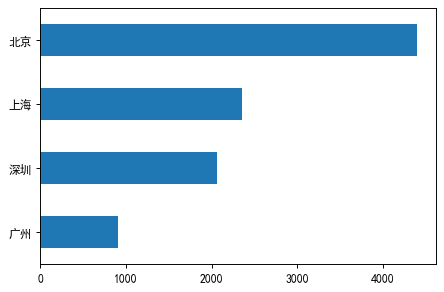

In [32]:
# 城市
fig = plt.figure(dpi=85)
py_jobs_final['city'].value_counts(ascending=True).plot.barh()

<AxesSubplot:ylabel='p1stCat,p2ndCat'>

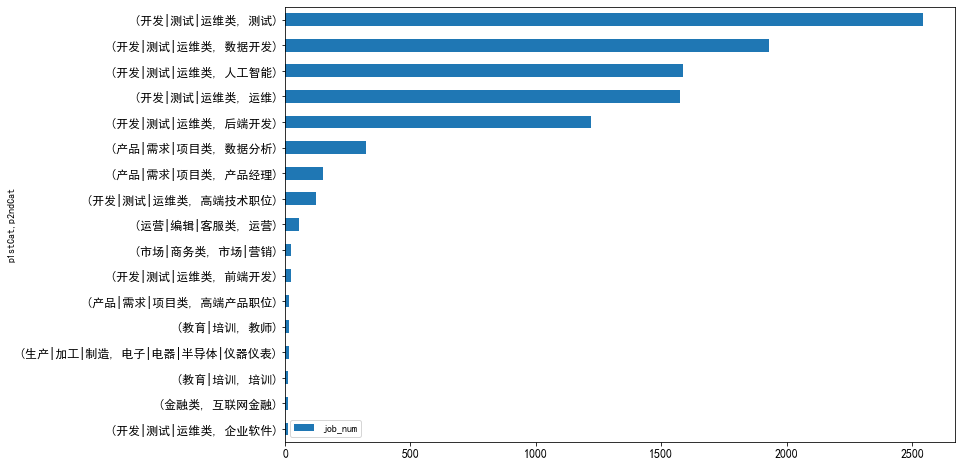

In [33]:
tmp_df = py_jobs_final.groupby(['p1stCat', 'p2ndCat']).count()[['_id']].sort_values(by='_id')
tmp_df = tmp_df.rename(columns={'_id':'job_num'})
tmp_df = tmp_df[tmp_df['job_num'] > 10]

tmp_df.plot.barh(figsize=(12,8), fontsize=12)

### 2.1 两维交叉分析

In [34]:
# 定义一些函数，将文本列转为数字

# 薪资转为数字
def get_salary_number(salary):
    salary = salary.lower().replace('k', '')
    salary_lu = salary.split('-')
    lower = int(salary_lu[0])
    if len(salary_lu) == 1:
        return lower
    upper = int(salary_lu[1])
    
    return (lower + upper) / 2

In [35]:
# 工作经验转数字
work_year_map = {
    '在校/应届': 0,
    '不限': None,
    '1年以下': 1,
    '10年以上': 11
}

def get_work_year_number(work_year):
    if work_year in work_year_map:
        return work_year_map[work_year]
    else:
        work_year = work_year.replace('年', '')
        work_year_lu = work_year.split('-')
        return (int(work_year_lu[0]) + int(work_year_lu[1])) / 2

In [36]:
# 公司规模转数字
csize_map = {
    '2000人以上': 2000,
    '少于15人': 15
}

def get_csize_number(csize):
    if csize in csize_map:
        return csize_map[csize]
    else:
        csize = csize.replace('人', '')
        csize_lu = csize.split('-')
        return (int(csize_lu[0]) + int(csize_lu[1])) / 2

In [37]:
# 将3个文字列转为数字
py_jobs_final['salary_no'] = py_jobs_final['salary'].map(get_salary_number)
py_jobs_final['work_year_no'] = py_jobs_final['workYear'].map(get_work_year_number)
py_jobs_final['csize_no'] = py_jobs_final['cSize'].map(get_csize_number)

d:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [38]:
py_jobs_final.head(3)

,_id,businessZone,cId,cName,cSize,city,createTime,district,education,financeStage,...,pType,reTime,salary,salaryMonth,workAddress,workYear,createMon,salary_no,work_year_no,csize_no
0,4775802,None,62,字节跳动,2000人以上,北京,1607716386000,海淀区,本科,D轮及以上,...,Python,1607673115000,25k-40k,0,北京市海淀区北三环西路43号中航广场,1-3年,2020-12,32.5,2.0,2000.0
1,6778769,None,62,字节跳动,2000人以上,北京,1607716786000,海淀区,本科,D轮及以上,...,Python,1607672377000,20k-40k,0,北三环西路43号中航广场1号楼（矮楼）,1-3年,2020-12,30.0,2.0,2000.0
2,6413833,None,410579,建信金科,2000人以上,北京,1607782466000,海淀区,本科,不需要融资,...,Python,1607585907000,20k-40k,0,北京市海淀区建行稻香湖数据中心,3-5年,2020-12,30.0,4.0,2000.0


In [39]:
# 只选择 开发|测试|运维类 一级分类下，测试、数据开发、人工智能、运维、后端开发 二级分类
job_arr = ['测试', '数据开发', '人工智能', '运维', '后端开发']
py_jobs_2ndcat = py_jobs_final[(py_jobs_final['p1stCat'] == '开发|测试|运维类') & (py_jobs_final['p2ndCat'].isin(job_arr))]

In [40]:
py_jobs_2ndcat.pivot_table(index='p2ndCat', columns='city', values='salary_no', aggfunc='mean')

city,上海,北京,广州,深圳
p2ndCat,,,,
人工智能,32.635279,31.587379,27.051852,29.911647
后端开发,23.738983,26.401213,18.544554,22.314286
数据开发,23.362700,27.921397,18.392265,24.994924
测试,21.668394,23.848254,14.760593,21.085106
运维,20.933983,23.554389,17.424699,21.536817


<IPython.core.display.Javascript object>


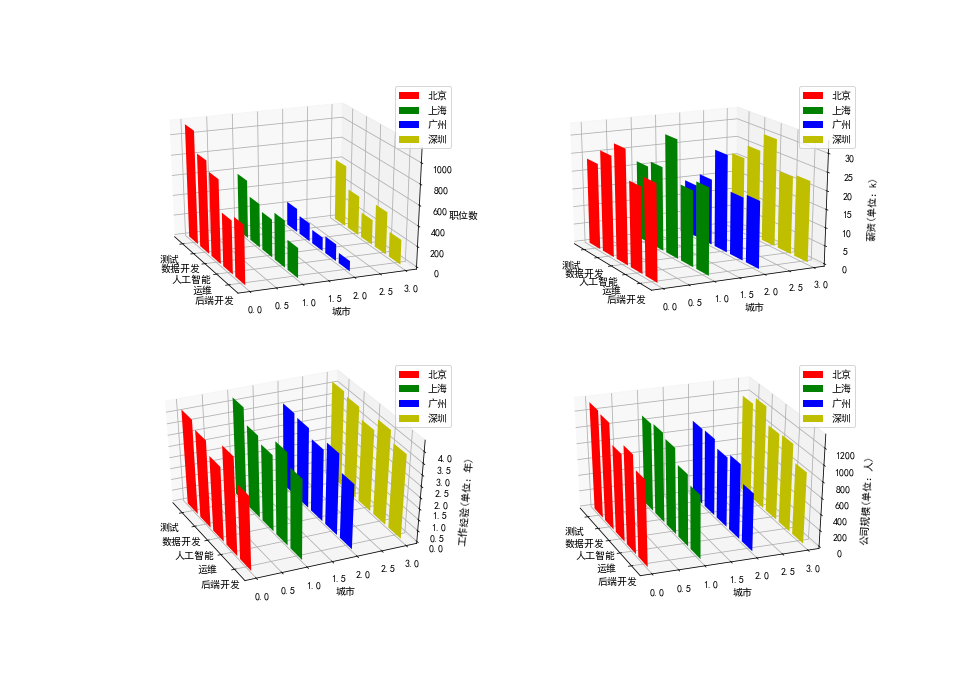

In [42]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
# 画3d柱状图
city_map = {'北京': 0, '上海': 1, '广州': 2, '深圳': 3} # 将城市转为数字，在坐标轴上显示
idx_map = {'pId': '职位数', 'salary_no': '薪资(单位：k)', 'work_year_no': '工作经验(单位：年)', 'csize_no': '公司规模(单位：人)'}

fig = plt.figure()
for i,col in enumerate(idx_map.keys()):
    if col == 'pId':
        aggfunc = 'count'
    else:
        aggfunc = 'mean'
    jobs_pivot = py_jobs_2ndcat.pivot_table(index='p2ndCat', columns='city', values=col, aggfunc=aggfunc)
    
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    for c, city in zip(['r', 'g', 'b', 'y'], city_map.keys()):
        ys = [jobs_pivot[city][job_name] for job_name in job_arr]
        cs = [c] * len(job_arr)
        
        ax.bar(job_arr, ys, zs=city_map[city], zdir='y', color=cs)
    
    ax.set_ylabel('城市')
    ax.set_zlabel(idx_map[col])
    ax.legend(city_map.keys())

plt.show()

### 2.2 多维钻取

In [41]:
# 分 城市、职位类型、（行业、公司规模、工作经验）等维度观察平均薪资、工作经验、公司规模等指标
py_jobs_2ndcat.head()

,_id,businessZone,cId,cName,cSize,city,createTime,district,education,financeStage,...,pType,reTime,salary,salaryMonth,workAddress,workYear,createMon,salary_no,work_year_no,csize_no
0,4775802,None,62,字节跳动,2000人以上,北京,1607716386000,海淀区,本科,D轮及以上,...,Python,1607673115000,25k-40k,0,北京市海淀区北三环西路43号中航广场,1-3年,2020-12,32.5,2.0,2000.0
1,6778769,None,62,字节跳动,2000人以上,北京,1607716786000,海淀区,本科,D轮及以上,...,Python,1607672377000,20k-40k,0,北三环西路43号中航广场1号楼（矮楼）,1-3年,2020-12,30.0,2.0,2000.0
2,6413833,None,410579,建信金科,2000人以上,北京,1607782466000,海淀区,本科,不需要融资,...,Python,1607585907000,20k-40k,0,北京市海淀区建行稻香湖数据中心,3-5年,2020-12,30.0,4.0,2000.0
3,4870150,None,127160,积云教育,150-500人,北京,1607755653000,延庆区,本科,A轮,...,Python,1607584051000,15k-30k,0,北京科技职业学院八达岭校区,3-5年,2020-12,22.5,4.0,325.0
4,8023682,安定门,164331,奇点浩翰,50-150人,北京,1607670489000,东城区,本科,未融资,...,Python,1607760221000,15k-30k,0,安定门东大街28号雍和大厦A座603,3-5年,2020-12,22.5,4.0,100.0


In [42]:
# 以北京、人工智能为例，看不同工作经验下的薪资差别
tmp_df = py_jobs_2ndcat[(py_jobs_2ndcat['city'] == '北京')]
tmp_df = tmp_df.pivot_table(index='workYear', columns='p2ndCat', values='salary_no', aggfunc='mean').sort_values(by='人工智能')
tmp_df

p2ndCat,人工智能,后端开发,数据开发,测试,运维
workYear,,,,,
在校/应届,15.298387,11.000000,10.920635,10.224138,8.763158
1年以下,16.937500,19.500000,7.928571,11.666667,8.500000
1-3年,27.425532,23.726923,23.881988,19.136842,17.421053
不限,30.582192,25.783333,26.861940,26.730496,23.347826
3-5年,36.281457,29.686192,29.777094,23.815195,23.941810
5-10年,45.064356,36.638889,36.274648,29.475983,29.818898
10年以上,77.500000,NaN,49.166667,37.083333,40.000000


In [43]:
[plt.scatter(job_name, wy, c='darkred', s=tmp_df[job_name][wy]*5) for wy in tmp_df.index.values for job_name in job_arr]

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000000000F0DC510> (for post_execute):


ValueError: need at least one array to concatenate

ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

## 3. 文本分析

In [44]:
# 先看看 职位标签能不能用
py_jobs_final[['pId', 'pLabels']].head(4)

,pId,pLabels
0,4775802,[后端]
1,6778769,None
2,6413833,"[互联网金融, 银行, Python, 后端]"
3,4870150,"[教育, Python]"


In [45]:
def plabel_contains_python(pLabels):
    if not pLabels:
        return False
    for label in pLabels:
        if label.lower() == 'python':
            return True
    return False

In [46]:
tmp_series = py_jobs_final['pLabels'].map(plabel_contains_python)

In [47]:
tmp_series.value_counts()
# 包含python的太少了，不用

False    7939
True     1776
Name: pLabels, dtype: int64

### 3.0 对正文分词

In [396]:
from bs4 import BeautifulSoup

In [397]:
# 使用BeautifulSoup 去掉html标签， 只保留正文内容，并转小写

py_jobs_final['p_text'] = py_jobs_final['pDetail'].map(lambda x: BeautifulSoup(x, 'lxml').get_text().lower())

py_jobs_final[['pId', 'pDetail', 'p_text']].head(2)

d:\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,pId,pDetail,p_text
0,4775802,职位职责：\n<br>1、负责今日头条商业变现产品后台服务的设计、开发、优化等研发工作，保证...,职位职责：\n1、负责今日头条商业变现产品后台服务的设计、开发、优化等研发工作，保证产品的质...
1,6778769,职位职责：\n<br>1、负责字节跳动业务线（包括头条、抖音、火山等）安全系统及产品的设计与...,职位职责：\n1、负责字节跳动业务线（包括头条、抖音、火山等）安全系统及产品的设计与开发；\...


In [50]:
job_detail = '职位职责：\n<br>1、负责今日头条商业变现产品后台服务的设计、开发、优化等研发工作，保证产品的质量和开发进度；\n<br>2、负责客户增长相关技术的设计与实现；\n<br>3、研究新兴技术，对产品进行持续优化。\n<br>\n<br>职位要求：\n<br>1、本科及以上学历，计算机相关专业，基础知识扎实；\n<br>2、聪明，学习能力强，有独立解决问题的能力；\n<br>3、熟悉面向对象编程，掌握java/c++/python/php中的至少一门语言；\n<br>4、良好的编程习惯，追求**的代码品质，熟悉常用设计模式和一般项目的开发流程； \n<br>5、开朗上进，积极沟通，善于团队协作。'

In [51]:
print(job_detail)

职位职责：
<br>1、负责今日头条商业变现产品后台服务的设计、开发、优化等研发工作，保证产品的质量和开发进度；
<br>2、负责客户增长相关技术的设计与实现；
<br>3、研究新兴技术，对产品进行持续优化。
<br>
<br>职位要求：
<br>1、本科及以上学历，计算机相关专业，基础知识扎实；
<br>2、聪明，学习能力强，有独立解决问题的能力；
<br>3、熟悉面向对象编程，掌握java/c++/python/php中的至少一门语言；
<br>4、良好的编程习惯，追求**的代码品质，熟悉常用设计模式和一般项目的开发流程； 
<br>5、开朗上进，积极沟通，善于团队协作。


In [52]:
import jieba

In [53]:
job_req = '熟悉面向对象编程，掌握java/c++/python/php中的至少一门语言；'

In [54]:
# 全模式
seg_list = jieba.cut(job_req, cut_all=True)
print(list(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jijin\AppData\Local\Temp\jieba.cache
Loading model cost 1.054 seconds.
Prefix dict has been built successfully.


['熟悉', '面向', '面向对象', '面向对象编程', '对象', '编程', '，', '掌握', 'java', '/', 'c++', '/', 'python', '/', 'php', '中', '的', '至少', '一门', '语言', '；']


In [55]:
# 精确模式
seg_list = jieba.cut(job_req, cut_all=False)
print(list(seg_list))

['熟悉', '面向对象编程', '，', '掌握', 'java', '/', 'c++', '/', 'python', '/', 'php', '中', '的', '至少', '一门', '语言', '；']


In [56]:
seg_list = jieba.cut_for_search(job_req)  # 搜索引擎模式
print(list(seg_list))

['熟悉', '面向', '对象', '编程', '面向对象编程', '，', '掌握', 'java', '/', 'c++', '/', 'python', '/', 'php', '中', '的', '至少', '一门', '语言', '；']


In [57]:
py_jobs_final[py_jobs_final['pDetail'].str.lower().str.contains('python')].info()
# 9665 个置为包含python， 几乎所有职位的正文里都包含python

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9665 entries, 0 to 19256
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            9665 non-null   int64  
 1   businessZone   4689 non-null   object 
 2   cId            9665 non-null   int64  
 3   cName          9665 non-null   object 
 4   cSize          9665 non-null   object 
 5   city           9665 non-null   object 
 6   createTime     9665 non-null   int64  
 7   district       9665 non-null   object 
 8   education      9665 non-null   object 
 9   financeStage   9665 non-null   object 
 10  hrId           9665 non-null   float64
 11  hrPosition     9419 non-null   object 
 12  hrTags         9665 non-null   object 
 13  industryField  9665 non-null   object 
 14  p1stCat        9665 non-null   object 
 15  p2ndCat        9665 non-null   object 
 16  p3rdCat        9665 non-null   object 
 17  pAdvantage     9665 non-null   object 
 18  pDetail

In [58]:
# 使用jieba精确模式对职位正文进行分词
py_jobs_final['p_text_cut'] = py_jobs_final['p_text'].map(lambda x: list(jieba.cut(x, cut_all=False)))

py_jobs_final[['pId', 'p_text', 'p_text_cut']].head()

d:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pId,p_text,p_text_cut
0,4775802,职位职责：\n1、负责今日头条商业变现产品后台服务的设计、开发、优化等研发工作，保证产品的质...,"[职位, 职责, ：, \n, 1, 、, 负责, 今日, 头条, 商业, 变现, 产品, ..."
1,6778769,职位职责：\n1、负责字节跳动业务线（包括头条、抖音、火山等）安全系统及产品的设计与开发；\...,"[职位, 职责, ：, \n, 1, 、, 负责, 字节, 跳动, 业务, 线, （, 包括..."
2,6413833,岗位职责：\n1、负责devops研发平台的设计、开发和优化工作；参与核心业务系统的技术规划...,"[岗位职责, ：, \n, 1, 、, 负责, devops, 研发, 平台, 的, 设计,..."
3,4870150,昌平地铁线---沙河高教园地铁站---提供往返班车。\n\n岗位职责：\n1、按照教学大纲、...,"[昌平, 地铁线, ---, 沙河, 高教, 园, 地铁站, ---, 提供, 往返, 班车..."
4,8023682,python开发工程师\n 岗位职责：\n1、负责监s-data控系统功能组件的优化及组件...,"[python, 开发, 工程师, \n, , , 岗位职责, ：, \n, 1, 、,..."


In [59]:
stop_words = [line.strip() for line in open('stop_words.txt',encoding='UTF-8').readlines()]

# 添加换行符
stop_words.append('\n')

In [60]:
# 去停用词
def remove_stop_word(p_text):
    if not p_text:
        return p_text
    
    new_p_txt = []
    for word in p_text:
        if word not in stop_words:
            new_p_txt.append(word)
    
    return new_p_txt

In [61]:
py_jobs_final['p_text_clean'] = py_jobs_final['p_text_cut'].map(remove_stop_word)

d:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
py_jobs_final[['pId', 'p_text_cut', 'p_text_clean']].head()

,pId,p_text_cut,p_text_clean
0,4775802,"[职位, 职责, ：, \n, 1, 、, 负责, 今日, 头条, 商业, 变现, 产品, ...","[职位, 职责, 负责, 今日, 头条, 商业, 变现, 产品, 后台, 服务, 设计, 开..."
1,6778769,"[职位, 职责, ：, \n, 1, 、, 负责, 字节, 跳动, 业务, 线, （, 包括...","[职位, 职责, 负责, 字节, 跳动, 业务, 线, 包括, 头条, 抖音, 火山, 安全..."
2,6413833,"[岗位职责, ：, \n, 1, 、, 负责, devops, 研发, 平台, 的, 设计,...","[岗位职责, 负责, devops, 研发, 平台, 设计, 开发, 优化, 工作, 参与,..."
3,4870150,"[昌平, 地铁线, ---, 沙河, 高教, 园, 地铁站, ---, 提供, 往返, 班车...","[昌平, 地铁线, ---, 沙河, 高教, 园, 地铁站, ---, 提供, 往返, 班车..."
4,8023682,"[python, 开发, 工程师, \n, , , 岗位职责, ：, \n, 1, 、,...","[python, 开发, 工程师, , , 岗位职责, 负责, 监, s, data, ..."


In [63]:
# 去停用词之前
print(py_jobs_final['p_text_cut'][0])

['职位', '职责', '：', '\n', '1', '、', '负责', '今日', '头条', '商业', '变现', '产品', '后台', '服务', '的', '设计', '、', '开发', '、', '优化', '等', '研发', '工作', '，', '保证', '产品', '的', '质量', '和', '开发进度', '；', '\n', '2', '、', '负责', '客户', '增长', '相关', '技术', '的', '设计', '与', '实现', '；', '\n', '3', '、', '研究', '新兴', '技术', '，', '对', '产品', '进行', '持续', '优化', '。', '\n', '\n', '职位', '要求', '：', '\n', '1', '、', '本科', '及', '以上学历', '，', '计算机相关', '专业', '，', '基础知识', '扎实', '；', '\n', '2', '、', '聪明', '，', '学习', '能力', '强', '，', '有', '独立', '解决问题', '的', '能力', '；', '\n', '3', '、', '熟悉', '面向对象编程', '，', '掌握', 'java', '/', 'c++', '/', 'python', '/', 'php', '中', '的', '至少', '一门', '语言', '；', '\n', '4', '、', '良好', '的', '编程', '习惯', '，', '追求', '*', '*', '的', '代码', '品质', '，', '熟悉', '常用', '设计模式', '和', '一般', '项目', '的', '开发', '流程', '；', ' ', '\n', '5', '、', '开朗', '上', '进', '，', '积极', '沟通', '，', '善于', '团队', '协作', '。']


In [64]:
# 去停用词之后
print(py_jobs_final['p_text_clean'][0])

['职位', '职责', '负责', '今日', '头条', '商业', '变现', '产品', '后台', '服务', '设计', '开发', '优化', '研发', '工作', '保证', '产品', '质量', '开发进度', '负责', '客户', '增长', '相关', '技术', '设计', '实现', '研究', '新兴', '技术', '产品', '进行', '持续', '优化', '职位', '要求', '本科', '以上学历', '计算机相关', '专业', '基础知识', '扎实', '聪明', '学习', '能力', '强', '独立', '解决问题', '能力', '熟悉', '面向对象编程', '掌握', 'java', 'c++', 'python', 'php', '中', '至少', '一门', '语言', '良好', '编程', '习惯', '追求', '代码', '品质', '熟悉', '常用', '设计模式', '项目', '开发', '流程', ' ', '开朗', '进', '积极', '沟通', '善于', '团队', '协作']


In [203]:
# 新增一列，将 p_text_clean 转成字符串类型
py_jobs_final['p_corp'] = py_jobs_final['p_text_clean'].map(lambda x: ' '.join(x))

d:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [209]:
py_jobs_final[['p_text_clean', 'p_corp']].head(4)

,p_text_clean,p_corp
0,"[职位, 职责, 负责, 今日, 头条, 商业, 变现, 产品, 后台, 服务, 设计, 开...",职位 职责 负责 今日 头条 商业 变现 产品 后台 服务 设计 开发 优化 研发 工作 保...
1,"[职位, 职责, 负责, 字节, 跳动, 业务, 线, 包括, 头条, 抖音, 火山, 安全...",职位 职责 负责 字节 跳动 业务 线 包括 头条 抖音 火山 安全 系统 产品 设计 开发...
2,"[岗位职责, 负责, devops, 研发, 平台, 设计, 开发, 优化, 工作, 参与,...",岗位职责 负责 devops 研发 平台 设计 开发 优化 工作 参与 核心 业务 系统 技...
3,"[昌平, 地铁线, ---, 沙河, 高教, 园, 地铁站, ---, 提供, 往返, 班车...",昌平 地铁线 --- 沙河 高教 园 地铁站 --- 提供 往返 班车 岗位职责 教学大纲 ...


### 3.1 FP-Growth 挖掘关联关系

In [74]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

In [69]:
# 构造fp-growth需要的输入数据
def get_fpgrowth_input_df(dataset):
    te = TransactionEncoder()
    te_ary = te.fit(dataset).transform(dataset)
    return pd.DataFrame(te_ary, columns=te.columns_)

In [205]:
ai_jobs = py_jobs_final[(py_jobs_final['p1stCat'] == '开发|测试|运维类') & (py_jobs_final['p2ndCat'] == '人工智能')]

In [86]:
ai_fpg_in_df = get_fpgrowth_input_df(ai_jobs['p_text_clean'].values)

In [87]:
ai_fpg_in_df.head(4)

,\t,\r,,&&,++,------,-------,--------------------------------------,-------------------------------------------------------,-------------------------------------------------------------,...,留,理,行,器,敏,﻿,．,／,ａ,�
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [157]:
ai_fpg_df = fpgrowth(ai_fpg_in_df, min_support=0.6, use_colnames=True)

In [158]:
ai_fpg_df.head(50)

,support,itemsets
0,0.996215,(python)
1,0.942587,(算法)
2,0.902208,(学习)
3,0.862461,(熟悉)
4,0.776656,(要求)
5,0.705363,( )
6,0.696530,(机器)
7,0.695268,(优先)
8,0.874448,(相关)
9,0.777287,(能力)


In [159]:
ai_fpg_df[ai_fpg_df['itemsets'] ==frozenset(['算法', 'python'])]

,support,itemsets
16,0.938801,"(python, 算法)"


In [160]:
# 贝叶斯公式算概率
p_python = ai_fpg_df[ai_fpg_df['itemsets'] == frozenset(['python'])]['support'].values[0]

# python的岗位里，出现出现“算法”的概率
p_python_suanfa = ai_fpg_df[ai_fpg_df['itemsets'] == frozenset(['python', '算法'])]['support'].values[0]
print('p(算法|python) = %f' % (p_python_suanfa / p_python))


# python的岗位里，出现出现“机器学习”的概率
p_python_jiqi = ai_fpg_df[ai_fpg_df['itemsets'] == frozenset(['python', '机器'])]['support'].values[0]
print('p(机器学习|python) = %f' % (p_python_jiqi / p_python))

# python的岗位里，出现出现“深度学习”的概率
p_python_shendu = ai_fpg_df[ai_fpg_df['itemsets'] == frozenset(['python', '深度'])]['support'].values[0]
print('p(深度学习|python) = %f' % (p_python_shendu / p_python))

# python的岗位里，出现出现“经验”的概率
p_python_jingyan = ai_fpg_df[ai_fpg_df['itemsets'] == frozenset(['python', '经验'])]['support'].values[0]
print('p(经验|python) = %f' % (p_python_jingyan / p_python))

# python的岗位里，出现出现“c++”的概率
p_python_cpp = ai_fpg_df[ai_fpg_df['itemsets'] == frozenset(['python', 'c++'])]['support'].values[0]
print('p(c++|python) = %f' % (p_python_cpp / p_python))

p(算法|python) = 0.942369
p(机器学习|python) = 0.697277
p(深度学习|python) = 0.693477
p(经验|python) = 0.855605
p(c++|python) = 0.647878


In [161]:
ai_fpg_df[ai_fpg_df['itemsets'] == frozenset(['机器', '经验'])]

,support,itemsets
76,0.60694,"(经验, 机器)"


In [206]:
dt_jobs = py_jobs_final[(py_jobs_final['p1stCat'] == '开发|测试|运维类') & (py_jobs_final['p2ndCat'] == '数据开发')]

In [163]:
dt_fpg_in_df = get_fpgrowth_input_df(dt_jobs['p_text_clean'].values)

In [164]:
dt_fpg_in_df.head(4)

,\t,\r,,###,&&,++,---,-----,......,00,...,年,了,理,行,﻿,－,．,／,｀,￣
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [165]:
dt_fpg_df = fpgrowth(dt_fpg_in_df, min_support=0.6, use_colnames=True)

In [166]:
dt_fpg_df.head(20)

,support,itemsets
0,0.994813,(python)
1,0.910788,(数据)
2,0.898859,(经验)
3,0.834025,(熟悉)
4,0.788382,(要求)
5,0.773859,(能力)
6,0.765041,(工作)
7,0.757261,(相关)
8,0.724585,(优先)
9,0.699170,(开发)


In [181]:
# 贝叶斯公式算概率
p_python = dt_fpg_df[dt_fpg_df['itemsets'] == frozenset(['python'])]['support'].values[0]

# python的岗位里，出现出现“数据”的概率
p_python_shuju = dt_fpg_df[dt_fpg_df['itemsets'] == frozenset(['python', '数据'])]['support'].values[0]
print('p(数据|python) = %f' % (p_python_shuju / p_python))

# python的岗位里，出现出现“经验”的概率
p_python_jingyan = dt_fpg_df[dt_fpg_df['itemsets'] == frozenset(['python', '经验'])]['support'].values[0]
print('p(经验|python) = %f' % (p_python_jingyan / p_python))

# python的岗位里，出现出现“业务”的概率
p_python_yewu = dt_fpg_df[dt_fpg_df['itemsets'] == frozenset(['python', '业务'])]['support'].values[0]
print('p(业务|python) = %f' % (p_python_yewu / p_python))

# python的岗位里，出现出现“分析”的概率
p_python_fenxi = dt_fpg_df[dt_fpg_df['itemsets'] == frozenset(['python', '分析'])]['support'].values[0]
print('p(分析|python) = %f' % (p_python_fenxi / p_python))

p(数据|python) = 0.910845
p(经验|python) = 0.898853
p(业务|python) = 0.627737
p(分析|python) = 0.626694


### lda

In [183]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [335]:
def run_lda(corpus, k):
    cntvec = CountVectorizer(min_df=1, token_pattern='\w+')
    cnttf = cntvec.fit_transform(corpus)
    
    lda = LatentDirichletAllocation(n_components=k)
    docres = lda.fit_transform(cnttf)
    
    return cntvec, cnttf, docres, lda

In [ ]:
def get_doc_topic(docs, topK=1):
    res = []
    
    for doc in docs:
        sorted_arr = np.argsort(-doc)[:topK]  # 逆序排取 topK
        res.append(['topic_%d:%.2f'% (i, doc[i]) for i in sorted_arr])
        
    return res        

In [355]:
def get_topic_word(topics, words, topK=10):
    res = []
    
    for topic in topics:
        sorted_arr = np.argsort(-topic)[:topK]  # 逆序排取 topK
        res.append(','.join(['%s:%.2f'% (words[i], topic[i]) for i in sorted_arr]))
        
    return '\n\n'.join(res)

In [364]:
cntvec, cnttf, docres, lda = run_lda(ai_jobs['p_corp'].values, 8)

In [365]:
print(lda.perplexity(cntTf))

657.4423441651202


In [366]:
print(get_topic_word(lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis], cntvec.get_feature_names(), 20))

算法:0.02,相关:0.02,学习:0.02,熟悉:0.02,经验:0.02,nlp:0.01,能力:0.01,知识:0.01,自然语言:0.01,文本:0.01,技术:0.01,处理:0.01,工作:0.01,优先:0.01,负责:0.01,图谱:0.01,分析:0.01,深度:0.01,开发:0.01,c:0.01

语音:0.05,识别:0.02,熟悉:0.01,技术:0.01,算法:0.01,c:0.01,模型:0.01,相关:0.01,合成:0.01,信号处理:0.01,风控:0.01,负责:0.01,语言:0.01,业务:0.01,经验:0.01,优化:0.01,音频:0.01,工作:0.01,python:0.01,开发:0.01

工作:0.01,公司:0.01,模型:0.01,实习:0.01,学习:0.01,团队:0.01,优先:0.01,开发:0.01,能力:0.01,天:0.01,算法:0.01,时间:0.01,相关:0.01,金融:0.00,要求:0.00,月:0.00,量化:0.00,经验:0.00,python:0.00,福利:0.00

平安:0.03,医疗:0.02,科技:0.01,集团:0.01,司乘:0.01,银行:0.01,安全:0.00,骑:0.00,哈啰:0.00,健康:0.00,风控:0.00,生态:0.00,金融:0.00,调度:0.00,定价:0.00,引擎:0.00,投放:0.00,资产:0.00,决策:0.00,供需:0.00

算法:0.03,学习:0.03,能力:0.02,数据:0.02,机器:0.02,经验:0.02,熟悉:0.02,相关:0.01,业务:0.01,模型:0.01,推荐:0.01,优化:0.01,工作:0.01,优先:0.01,用户:0.01,分析:0.01,python:0.01,负责:0.01,技术:0.01,开发:0.01

and:0.02,to:0.01,of:0.01,in:0.01,learning:0.01,the:0.01,ai:0.01,or:0.01,with:0.01,machine:0.01,experience:0.01,for:0.01,deep:0.00,创新:0.00,a:0.00,knowledge:0.00,data:0.00,查:0.00,天眼:0.0

In [392]:
cntvec, cnttf, docres, lda = run_lda(dt_jobs['p_corp'].values, 6)

In [393]:
print(lda.perplexity(cnttf))

658.9398659730366


In [394]:
print(get_topic_word(lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis], cntvec.get_feature_names(), 20))

数据:0.05,开发:0.03,熟悉:0.02,经验:0.02,负责:0.01,能力:0.01,相关:0.01,工作:0.01,优先:0.01,平台:0.01,技术:0.01,设计:0.01,数据仓库:0.01,python:0.01,spark:0.01,业务:0.01,hadoop:0.01,以上:0.01,要求:0.01,java:0.01

and:0.04,data:0.02,to:0.02,of:0.02,in:0.02,the:0.02,a:0.02,with:0.01,or:0.01,for:0.01,is:0.01,business:0.01,experience:0.01,you:0.00,team:0.00,be:0.00,skills:0.00,on:0.00,big:0.00,systems:0.00

公司:0.01,数据库:0.01,技术:0.01,提供:0.01,团队:0.01,年:0.01,平台:0.01,应用:0.01,管理:0.01,云:0.00,数据:0.00,欺诈:0.00,员工:0.00,福利:0.00,工作:0.00,能力:0.00,成长:0.00,mysql:0.00,海外:0.00,熟悉:0.00

算法:0.03,学习:0.02,能力:0.01,熟悉:0.01,机器:0.01,相关:0.01,技术:0.01,优先:0.01,职位:0.01,经验:0.01,c:0.01,推荐:0.01,用户:0.01,工作:0.01,python:0.01,开发:0.01,优化:0.01,深度:0.01,良好:0.01,要求:0.01

数据:0.04,业务:0.03,分析:0.03,数据分析:0.02,能力:0.02,工作:0.01,经验:0.01,相关:0.01,优先:0.01,产品:0.01,用户:0.01,进行:0.01,python:0.01,模型:0.01,运营:0.01,使用:0.01,数学:0.01,sql:0.01,团队:0.01,问题:0.01

爬虫:0.03,熟悉:0.02,经验:0.01,抓取:0.01,技术:0.01,负责:0.01,数据:0.01,工作:0.01,开发:0.01,系统:0.01,python:0.01,网页:0.01,采集:0.01,框架:0.01,能力:0.01,要求:0.01,网络: